In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
from adforce.mesh import xr_loader


def line_up_times(path_in="/work/n01/n01/sithom/adcirc-swan/kat.nws13.2004.wrap/"):
    ds = xr_loader(os.path.join(path_in, "fort.63.nc"), use_dask=True)
    print("fort63", ds)
    ds = xr_loader(os.path.join(path_in, "fort.64.nc"), use_dask=True)
    print("fort64", ds)
    ds = xr_loader(os.path.join(path_in, "fort.73.nc"), use_dask=True)
    print("fort73", ds)
    ds = xr_loader(os.path.join(path_in, "fort.74.nc"), use_dask=True)
    print("fort74", ds)
line_up_times()

/work/n01/n01/sithom/miniconda3/lib/python3.10/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


'xr_loader'  19.66754 s 

fort63 <xarray.Dataset>
Dimensions:      (time: 105, node: 417642, nele: 826866, nvertex: 3, mesh: 1,
                  nope: 2, neta: 122, nbou: 15, nvel: 8316)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-05T09:...
    x            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables:
    element      (nele, nvertex) int32 dask.array<chunksize=(826866, 3), meta=np.ndarray>
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    nvell  

In [3]:
path_in = "/work/n01/n01/sithom/adcirc-swan/kat.nws13.2004.wrap/"
ds = xr_loader(os.path.join(path_in, "fort.74.nc"), use_dask=True)
print("fort74", ds)

'xr_loader'  0.34728 s 

fort74 <xarray.Dataset>
Dimensions:      (time: 105, node: 417642, nele: 826866, nvertex: 3, mesh: 1,
                  nope: 2, neta: 122, nbou: 15, nvel: 8316)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-05T09:...
    x            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables: (12/13)
    element      (nele, nvertex) int32 dask.array<chunksize=(826866, 3), meta=np.ndarray>
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    

In [4]:
from adforce.fort22 import read_fort22

f22 = read_fort22(os.path.join(path_in, "fort.22.nc"))

In [5]:
f22

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       group_order:  Main TC1
│       institution:  Oceanweather Inc. (OWI)
│       conventions:  CF-1.6 OWI-NWS13
├── DataTree('Main')
│       Dimensions:  (time: 673, yi: 385, xi: 393)
│       Coordinates:
│           lon      (yi, xi) float64 ...
│           lat      (yi, xi) float64 ...
│         * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
│       Dimensions without coordinates: yi, xi
│       Data variables:
│           PSFC     (time, yi, xi) float32 ...
│           U10      (time, yi, xi) float32 ...
│           V10      (time, yi, xi) float32 ...
│       Attributes:
│           rank:     1
└── DataTree('TC1')
        Dimensions:  (time: 481, yi: 161, xi: 161)
        Coordinates:
            lon      (time, yi, xi) float64 ...
            lat      (time, yi, xi) float64 ...
          * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-14
        Dimensions without coordinates: yi, xi
        Data variables:
            clon     (time) float64 ...
            clat     (time) float64 ...
            PSFC     (time, yi, xi) float32 ...
            U10      (time, yi, xi) float32 ...
            V10      (time, yi, xi) float32 ...
        Attributes:
            rank:     2

In [6]:
lons = f22["Main"].lon.values
lats = f22["Main"].lat.values

from src.constants import NEW_ORLEANS

sq_distances = (lons - NEW_ORLEANS.lon)**2 + (lats - NEW_ORLEANS.lat)**2

min_idx = sq_distances.argmin()

In [7]:
sq_distances.ravel()[min_idx]

0.0052534599999999355

In [8]:
import numpy as np
min_idxs = np.unravel_index(sq_distances.argmin(), sq_distances.shape)

In [9]:
print(min_idxs)

(240, 71)


In [10]:
print(min_idx, lons.ravel()[min_idx], lats.ravel()[min_idx], NEW_ORLEANS.lon, NEW_ORLEANS.lat)

94391 -90.125 30.0 -90.0715 29.9511


In [14]:
print(min_idxs, lons[min_idxs], lats[min_idxs], NEW_ORLEANS.lon, NEW_ORLEANS.lat)

(240, 71) -90.125 30.0 -90.0715 29.9511


In [15]:
f22["Main"]

DataTree('Main', parent="None")
    Dimensions:  (time: 673, yi: 385, xi: 393)
    Coordinates:
        lon      (yi, xi) float64 -99.0 -98.88 -98.75 -98.62 ... -50.25 -50.12 -50.0
        lat      (yi, xi) float64 0.0 0.0 0.0 0.0 0.0 ... 48.0 48.0 48.0 48.0 48.0
      * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
    Dimensions without coordinates: yi, xi
    Data variables:
        PSFC     (time, yi, xi) float32 ...
        U10      (time, yi, xi) float32 ...
        V10      (time, yi, xi) float32 ...
    Attributes:
        rank:     1

In [18]:
# from src.constants import NEW_ORLEANS
u10no = f22["Main"].U10.isel(xi=min_idxs[1], yi=min_idxs[0])
u10no

<xarray.DataArray 'U10' (time: 673)>
[673 values with dtype=float32]
Coordinates:
    lon      float64 -90.12
    lat      float64 30.0
  * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
Attributes:
    units:    m s-1

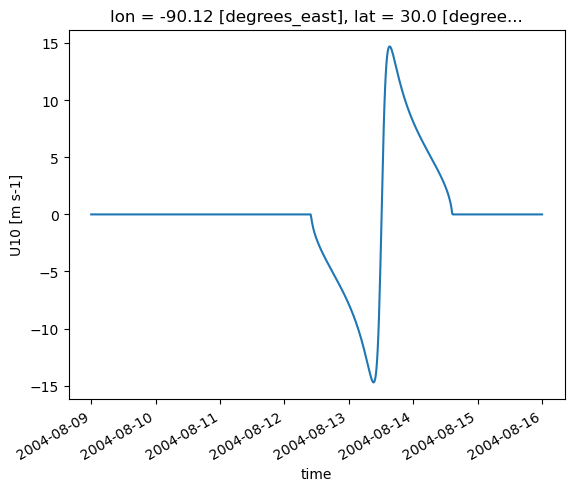

In [19]:
u10no.plot()

In [20]:
ds

<xarray.Dataset>
Dimensions:      (time: 105, node: 417642, nele: 826866, nvertex: 3, mesh: 1,
                  nope: 2, neta: 122, nbou: 15, nvel: 8316)
Coordinates:
  * time         (time) datetime64[ns] 2004-08-01T01:00:00 ... 2004-08-05T09:...
    x            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
    y            (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables: (12/13)
    element      (nele, nvertex) int32 dask.array<chunksize=(826866, 3), meta=np.ndarray>
    adcirc_mesh  (mesh) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nvdll        (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    max_nvdll    int32 ...
    ibtypee      (nope) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    nbdv         (neta) int32 dask.array<chunksize=(122,), meta=np.ndarray>
    ...           ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 dask.array<chunksize=(15,), meta=np.ndarray>
    nbvv         (nvel) int32 dask.array<chunksize=(8316,), meta=np.ndarray>
    depth        (node) float64 dask.array<chunksize=(417642,), meta=np.ndarray>
    windx        (time, node) float64 dask.array<chunksize=(1, 417642), meta=np.ndarray>
    windy        (time, node) float64 dask.array<chunksize=(1, 417642), meta=np.ndarray>
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            3797627
    grid_type:          Triangular
    description:        ﻿ASGS      ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    agrid:              grid
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [21]:
sq_distances_ds = (ds.x.values - NEW_ORLEANS.lon)**2 + (ds.y.values - NEW_ORLEANS.lat)**2

In [22]:
min_idx_ds = sq_distances_ds.argmin()

In [24]:
u10no_ds = ds.windx.isel(node=min_idx_ds)

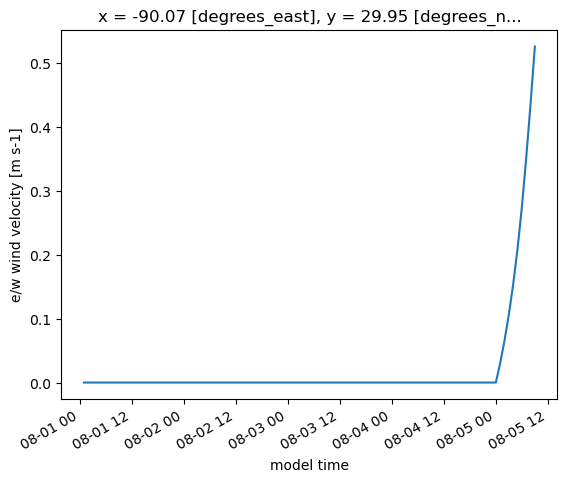

In [25]:
u10no_ds.plot()

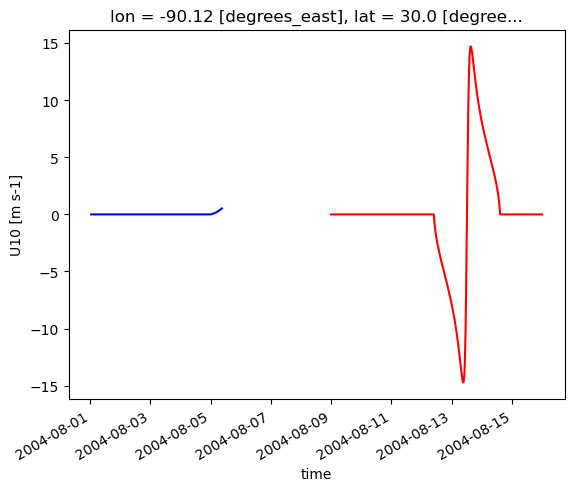

In [26]:
u10no_ds.plot(color="blue")
u10no.plot(color="red")

In [55]:
from matplotlib import pyplot as plt
from sithom.place import Point

def inspect_impact(da):
    nonzeros = np.nonzero(da.values)[0]
    first_nonzero = nonzeros[0]
    final_nonzero = nonzeros[-1]
    print(
        first_nonzero,
        final_nonzero,
        da.time.values[first_nonzero],
        da.time.values[final_nonzero],
        da.time.values[final_nonzero] - da.time.values[first_nonzero],
    )
    return da.time.values[first_nonzero]


def plot_u10_windx_at_a_point(path_in: str, point: Point, plot: bool = True):
    ds = xr_loader(os.path.join(path_in, "fort.74.nc"), use_dask=True)
    f22 = read_fort22(os.path.join(path_in, "fort.22.nc"))
    lons = f22["Main"].lon.values
    lats = f22["Main"].lat.values
    sq_distances_f22 = (lons - point.lon)**2 + (lats - point.lat)**2
    min_idxs = np.unravel_index(sq_distances_f22.argmin(), sq_distances_f22.shape)
    sq_distances_ds = (ds.x.values - point.lon)**2 + (ds.y.values - point.lat)**2
    min_idx_ds = sq_distances_ds.argmin()
    u10no = f22["Main"].U10.isel(xi=min_idxs[1], yi=min_idxs[0])
    u10no_ds = ds.windx.isel(node=min_idx_ds)
    if plot:
        u10no_ds.plot(color="blue", label="fort.74")
        u10no.plot(color="red", label="fort.22")
        plt.legend()
        plt.show()
    # change times to match start
    print("fort.22")
    f22_start = inspect_impact(u10no)
    print("fort.74")
    f74_start = inspect_impact(u10no_ds)
    u10no_ds_new_times = u10no_ds.time.values - f74_start + f22_start
    del u10no_ds["time"]
    u10no_ds["time"] = ("time", u10no_ds_new_times)
    if plot:
        u10no_ds.plot(color="blue", label="fort.74")
        u10no.plot(color="red", label="fort.22")
        plt.legend()
        plt.show()

'xr_loader'  0.24218 s 

f22
326 536 2004-08-12T09:30:00.000000000 2004-08-14T14:00:00.000000000 189000000000000 nanoseconds
f74
96 133 2004-08-05T01:00:00.000000000 2004-08-06T14:00:00.000000000 133200000000000 nanoseconds


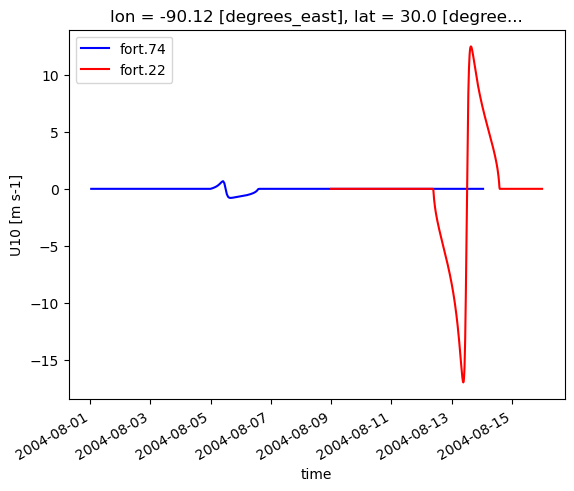

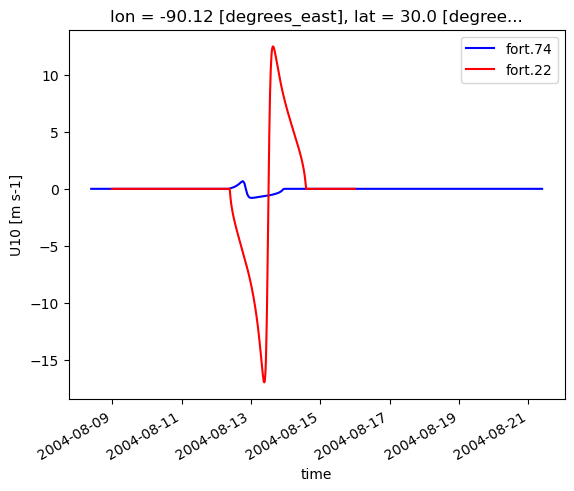

In [56]:
plot_u10_windx_at_a_point(
    "/work/n01/n01/sithom/adcirc-swan/kat.nws13.2004.wrap3", NEW_ORLEANS
)

'xr_loader'  2.73926 s 

f22
326 536 2004-08-12T09:30:00.000000000 2004-08-14T14:00:00.000000000 189000000000000 nanoseconds
f74
96 133 2004-08-05T01:00:00.000000000 2004-08-06T14:00:00.000000000 133200000000000 nanoseconds


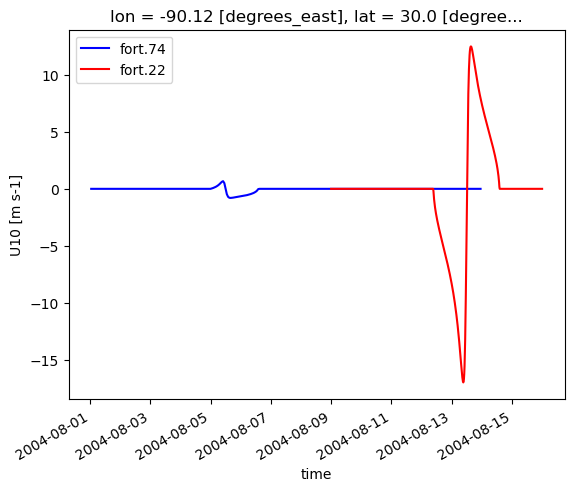

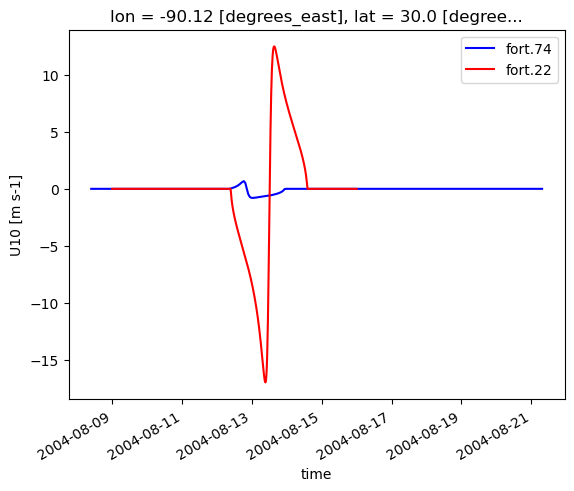

In [57]:
plot_u10_windx_at_a_point(
    "/work/n01/n01/sithom/adcirc-swan/kat.nws13.2004.wrap2", NEW_ORLEANS
)

'xr_loader'  0.21441 s 

f22
328 538 2004-08-12T10:00:00.000000000 2004-08-14T14:30:00.000000000 189000000000000 nanoseconds
f74
96 133 2004-08-05T01:00:00.000000000 2004-08-06T14:00:00.000000000 133200000000000 nanoseconds


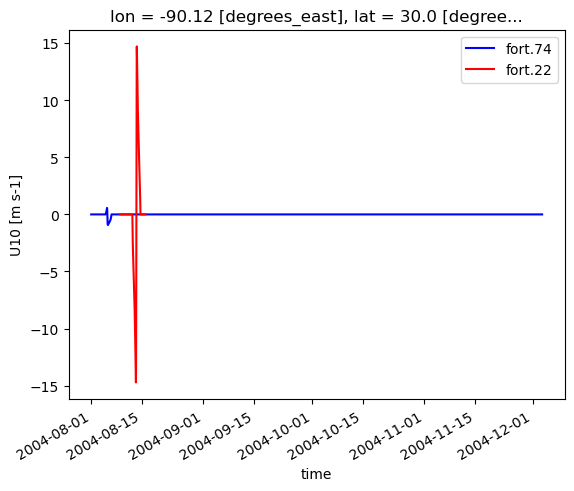

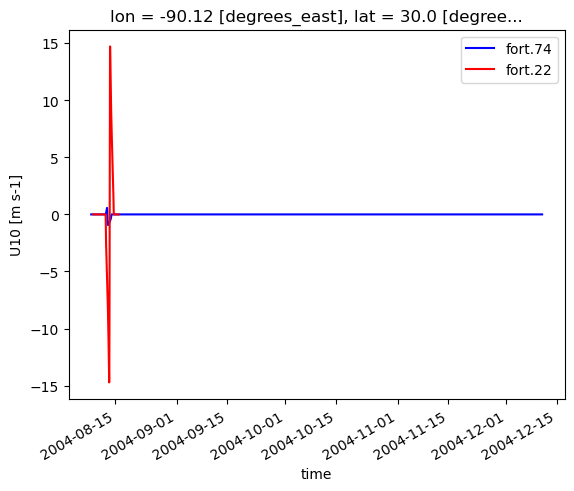

In [58]:
plot_u10_windx_at_a_point(
    "/work/n01/n01/sithom/adcirc-swan/kat.nws13.new", NEW_ORLEANS
)

'xr_loader'  0.13281 s 

f22
328 538 2004-08-12T10:00:00.000000000 2004-08-14T14:30:00.000000000 189000000000000 nanoseconds
f74
96 133 2014-05-03T01:00:00.000000000 2014-05-04T14:00:00.000000000 133200000000000 nanoseconds


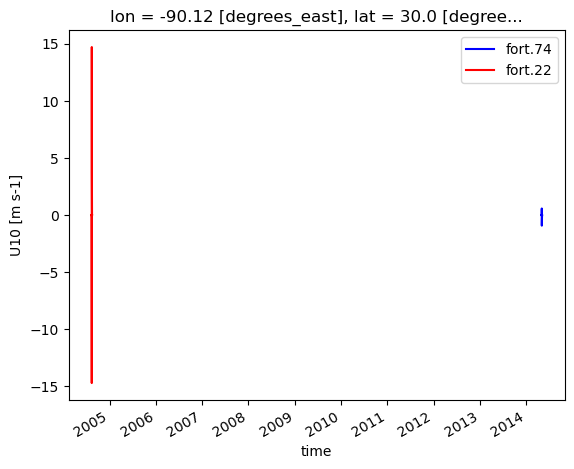

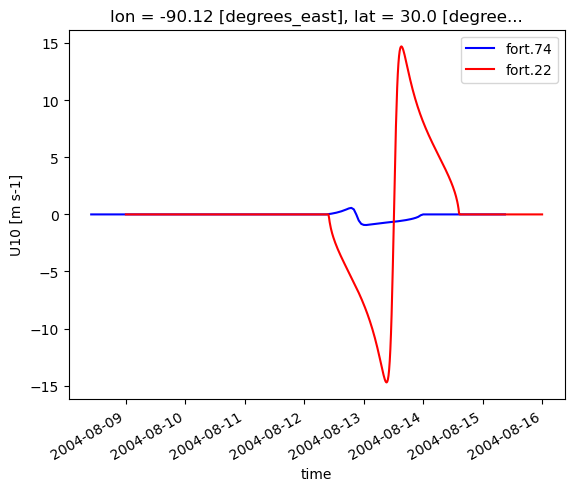

In [59]:
plot_u10_windx_at_a_point("/work/n01/n01/sithom/adcirc-swan/kat.nws13", NEW_ORLEANS)

In [ ]:
plot_u10_windx_at_a_point("", NEW_ORLEANS)